# Evaluations 101

This lesson (and the subsequent eight additional lessons) focus on approaches for writing LLM use-case evaluations, a critical component of developing AI-powered applications.  

In the rapidly evolving landscape of artificial intelligence, large language models have become powerful tools for businesses across various industries. However, harnessing the full potential of these models requires more than just implementation—it demands careful evaluation and optimization. This is where prompt evaluations, or "evals," come into play.

These are two real quotes from our internal Solutions Architect team explaining why evaluations are so important:

>The (in)ability for teams to measure the performance of their models is the biggest blocker of production use cases for LLMs and also makes prompting an art instead of a science

>even though evals take a lot of time, doing them up front will save developer time in the long run and result in better products getting out much sooner

There are two main reasons developers are not writing evaluations:
1. Many people are unfamiliar with the entire idea of evaluations
2. It's unclear how to actually implement evaluations

This course aims to explain both pieces: what evaluations are and how to write them.

This introductory lesson tackles the first piece, giving an introduction to the concept of evaluations and a high-level overview of the various approaches to writing evaluations.

---


## Benchmarks
Before we dive into customer evaluations, let's take a moment to discuss the one form of evaluation that most people are familiar with: model benchmarks.

Model benchmarks are like the standardized tests of the AI world. Just as SAT scores are supposed to give colleges a general idea of a student's academic abilities, model benchmarks give us a broad sense of how well an AI model performs across a range of tasks.

Companies that create large language models run these benchmarks to show off what their models can do. You might see impressive scores on tests with quirky names like ARC, MMLU, or TruthfulQA. These benchmarks cover everything from basic reading comprehension to advanced reasoning and knowledge across various fields. They're useful for comparing different models and tracking overall progress in AI capabilities.  You may be familiar with model cards that display benchmark scores:

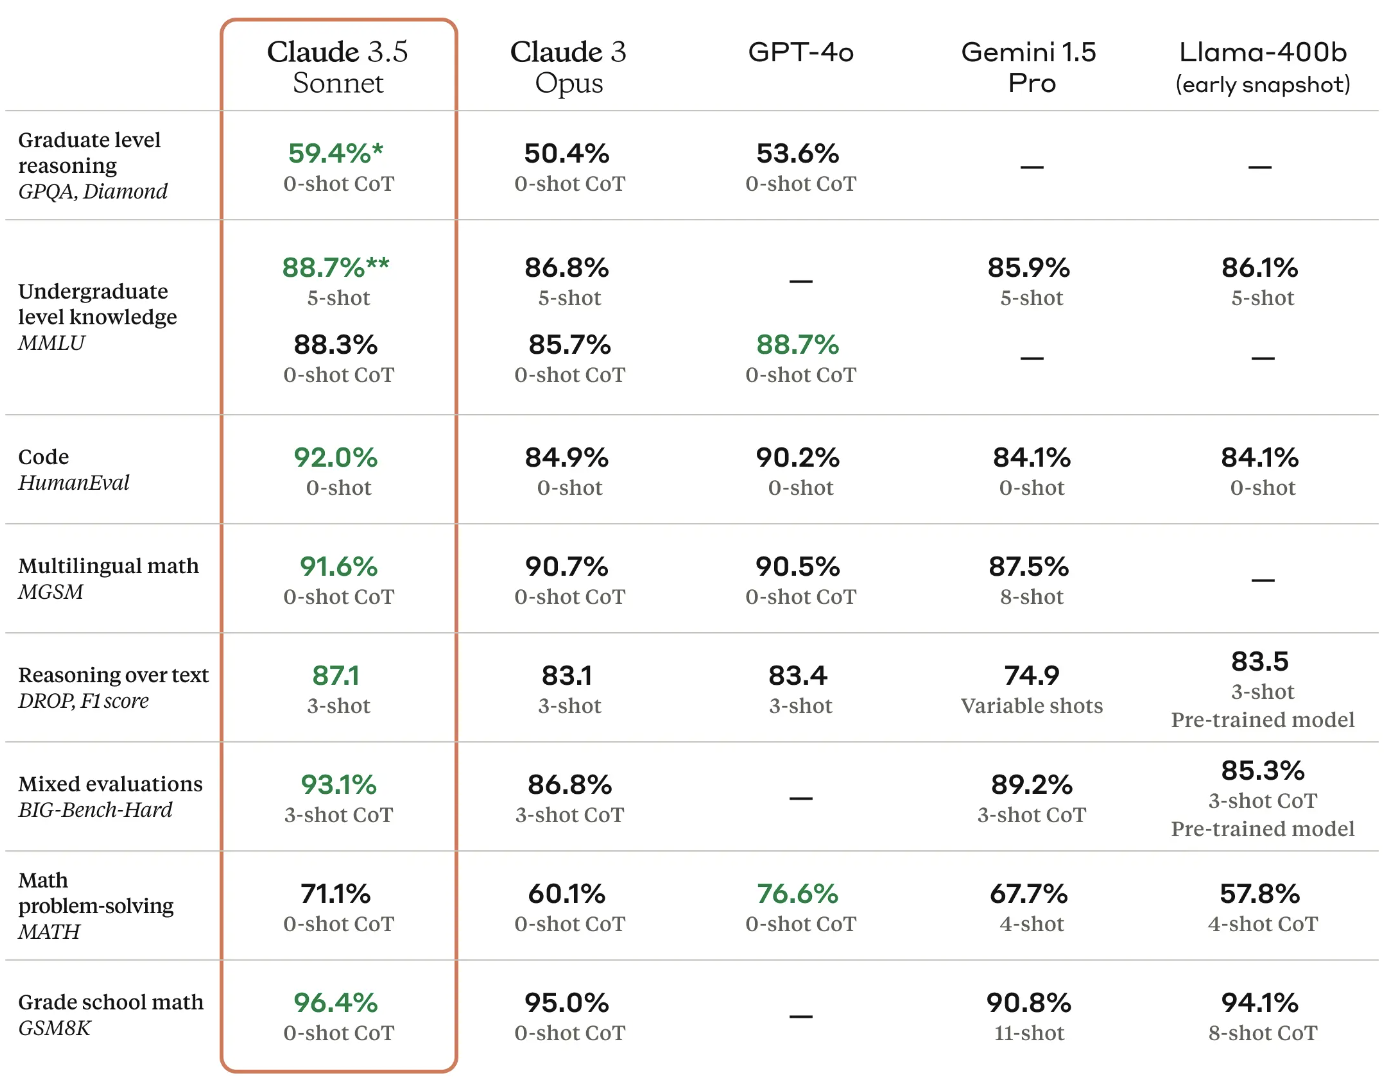



While these benchmarks are great for bragging rights and giving a general picture of a model's abilities, they're not the whole story. It's a bit like knowing someone's IQ score – it may (or may not!) tell you something about their general intelligence, but it doesn't tell you if they'd be good at your specific job.

---

## Customer evaluations

Imagine you've just bought a shiny new Swiss Army knife. It comes with dozens of tools and gadgets, but you're mainly interested in using it to open cans while camping. Sure, it's great that it can also file your nails or uncork wine bottles, but how well does it actually open cans? That's where prompt evaluations come in for large language models.

LLMs are like super-powered Swiss Army knives for text. They can do all sorts of amazing things with language, from writing poetry to coding software. But when you're using an LLM for a specific task – like answering customer service emails or generating product descriptions – you need to know how well it performs on that particular job.

This is where prompt evaluations, or "evals" for short, enter the picture. Prompt evaluations (also known as customer evaluations) are systematic tests designed to measure how well an LLM performs on your specific use case. They serve as a critical bridge between the generalized capabilities of LLMs and the unique demands of your business application. By implementing robust evals, you can ensure that the model and prompt combination not only meets general benchmarks but also excels in the particular tasks you need it to perform.

The main benefits of evaluations include:

* Iterative prompt improvement - is v2 of my prompt doing better than v1 at my specific task?
* Quality assurance before and after deployment and prompt changes - did our latest prompt update cause a regression?
* Objective model comparison - can we switch to Anthropic's newest model and maintain or better our current eval performance?
* Potential cost savings - can we switch to Anthropic's cheapest and fastest model and maintain our current eval performance?

When writing and optimizing prompts, we follow an iterative process that hinges around evaluations:

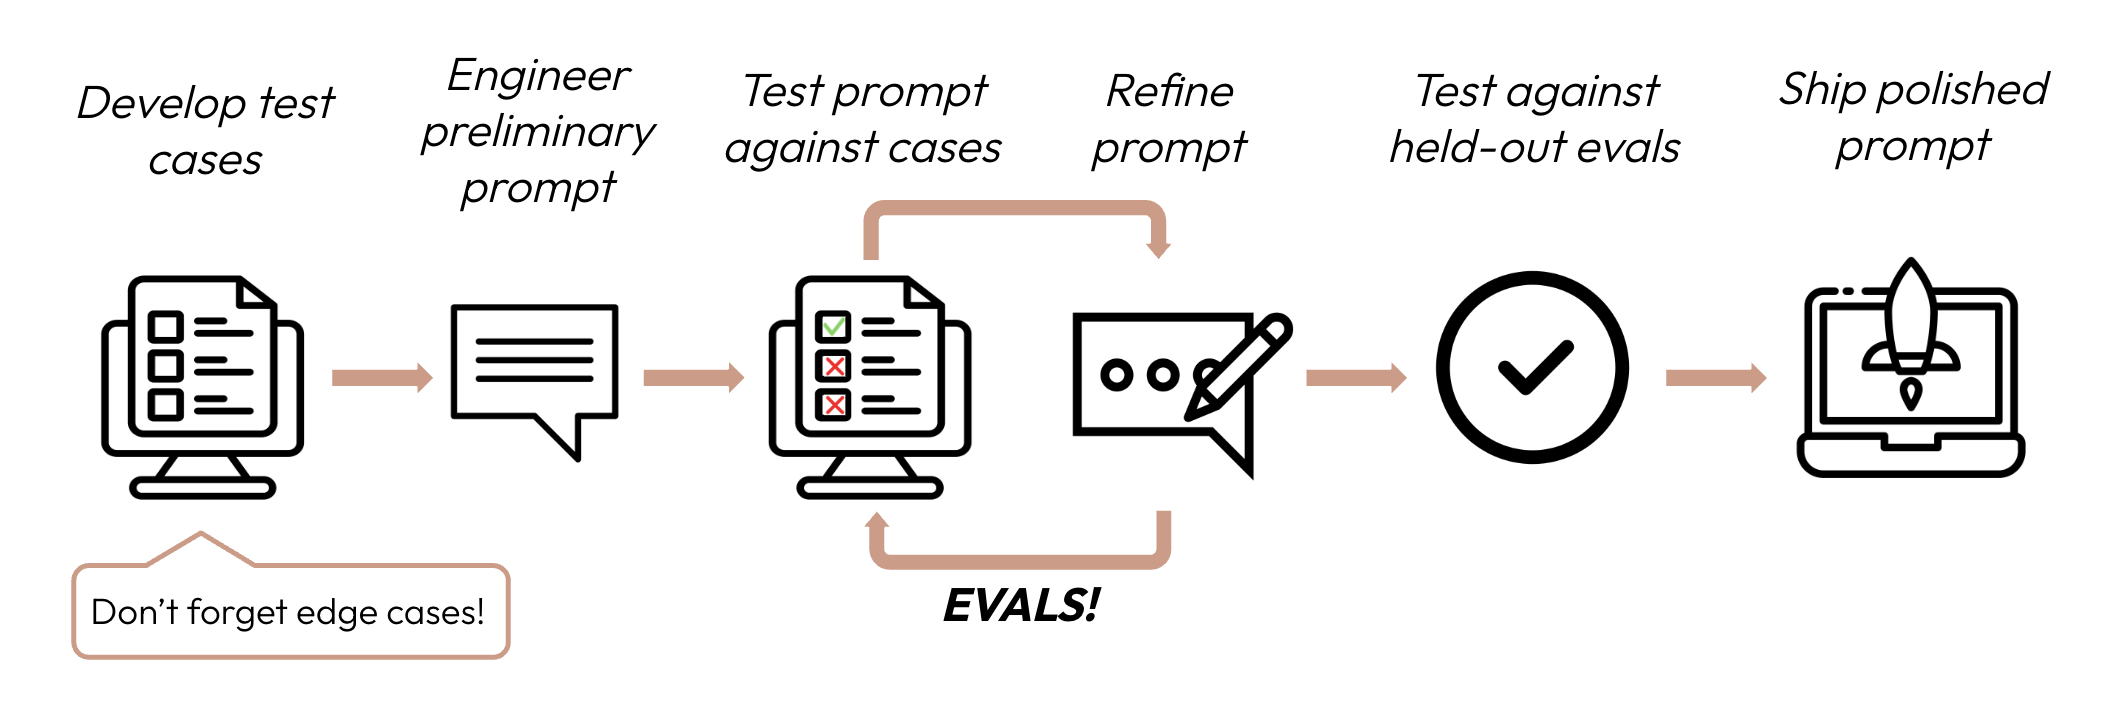



* We start by developing our test cases, which we'll learn more about in a moment.
* Then we write a rough draft of a prompt for our specific use-case.
* Next, we test our prompt with our set of test cases and measure how well the model did at our given task. We want some sort of baseline score.
* Once we have a baseline score, we can make changes to our prompt and repeat the process.

Evals are all about assigning metrics to quantify the quality of our prompt + model combination.  Without a quantitative measurement, how do we know if changes to a prompt are leading to improvements? 

---

## What goes into an eval?

A well-designed prompt evaluation consists of four primary components:

* **Example Input:** This is the instruction or question given to the model. It's crucial to design prompts that accurately represent the kinds of inputs your application will encounter in real-world use.
* **Golden Answer:** The correct or ideal response serves as a benchmark for the model's output. Creating high-quality golden answers often requires input from subject matter experts to ensure accuracy and relevance.
* **Model Output:** This is the actual response generated by the LLM based on the input prompt. It's what you'll be evaluating against the golden answer.
* **Score:** A quantitative or qualitative value representing the model's performance on that particular input. The scoring method can vary depending on the nature of your task and the grading approach you choose.

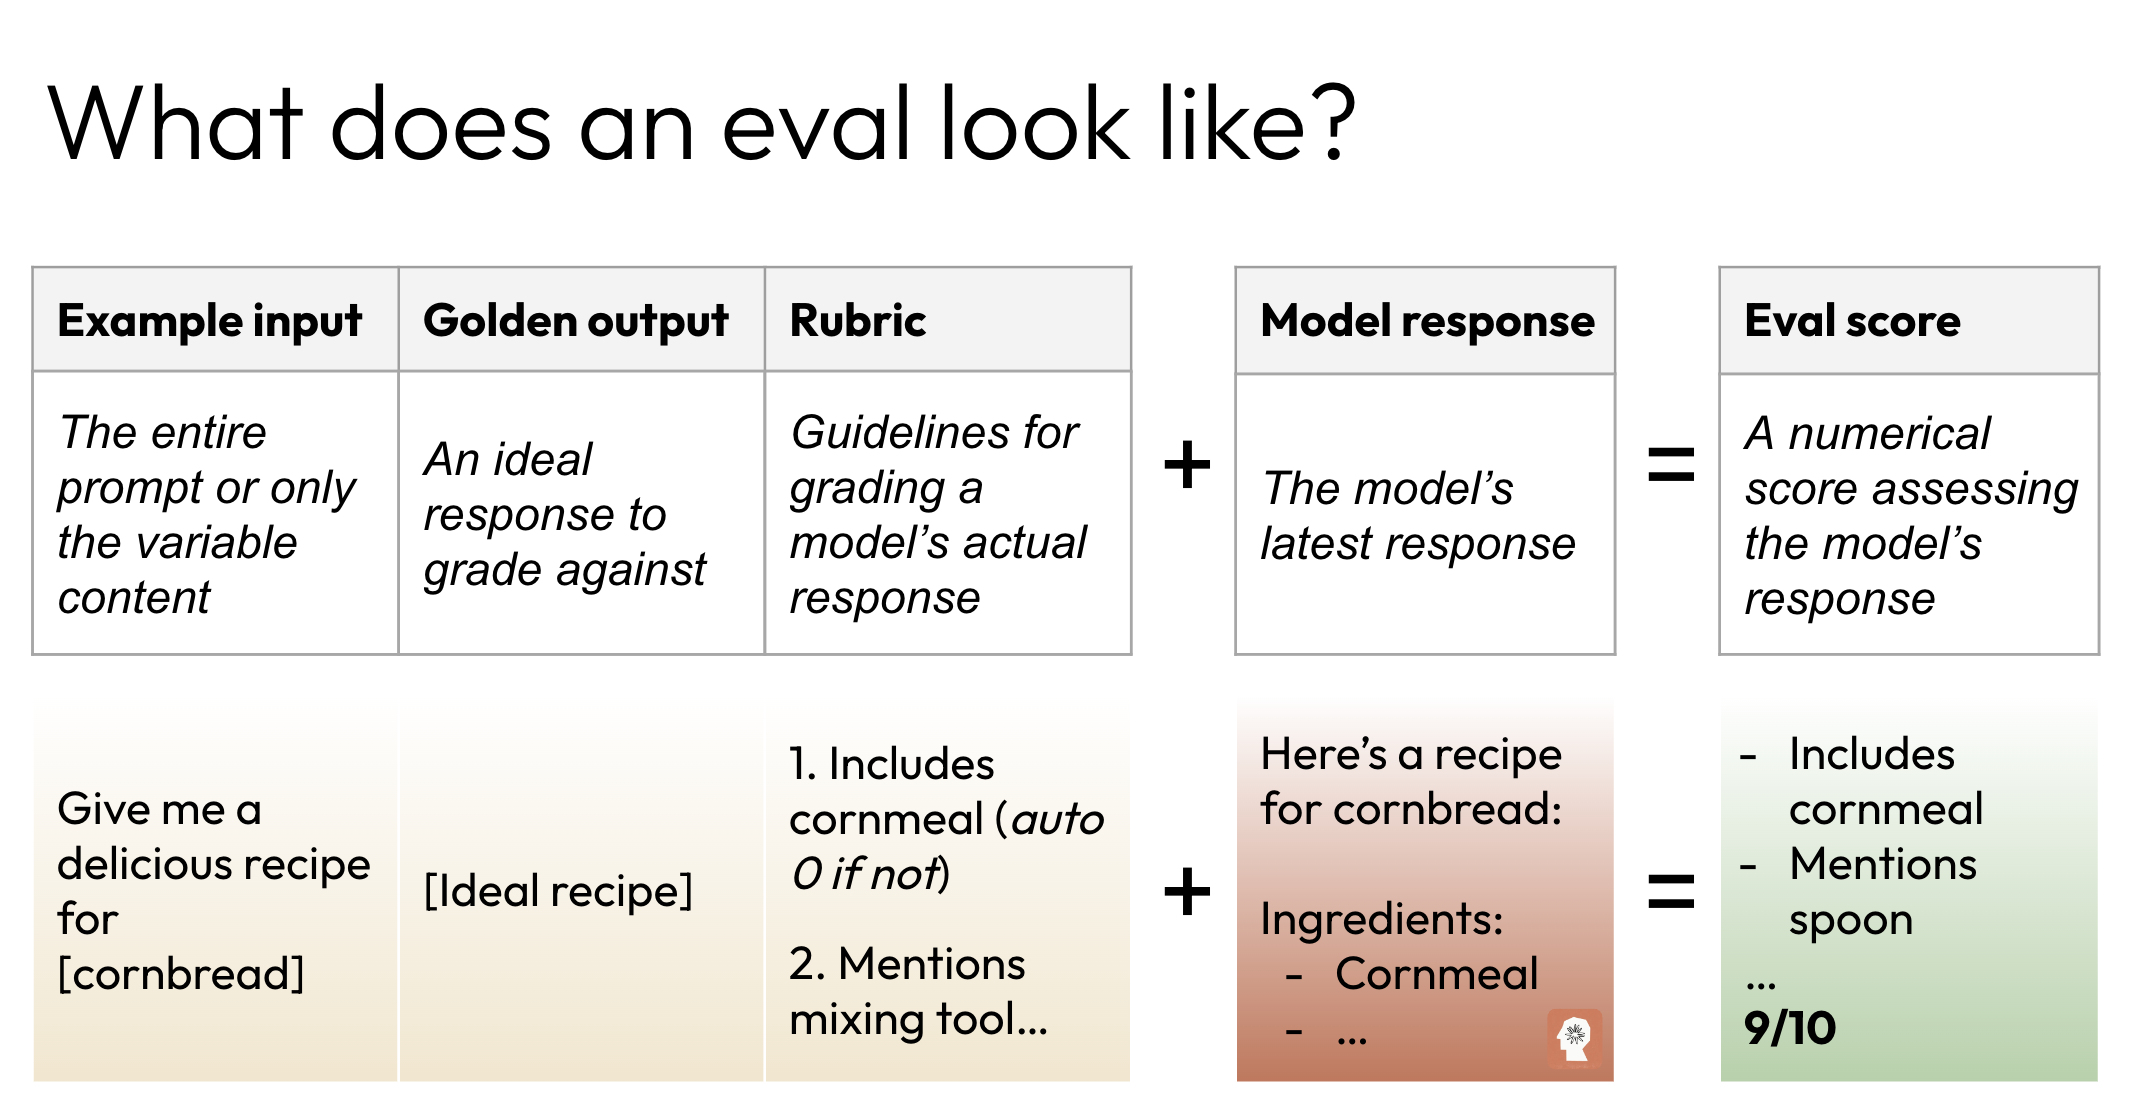

**We generally recommend at least 100 test-case/golden-answer pairs to get the best results, however to keep API costs down for learners following this course, most of our evals will use far fewer pairs.**

### Example eval data set

Imagine we want to use an LLM to classify complaints from customers.  A (very small) eval data set might look like this:

```py
eval_data = [
    {
        "complaint": "The app crashes every time I try to upload a photo",
        "golden_answer": ["Software Bug"]
    },
    {
        "complaint": "My printer isn't recognized by my computer",
        "golden_answer": ["Hardware Malfunction"]
    },
    {
        "complaint": "I can't figure out how to change my password",
        "golden_answer": ["User Error"]
    }
]
```
For each input complaint, we include a corresponding golden answer classification. We'll expand on this example in an upcoming lesson and learn how to run and grade the evaluation.

---

## Grading approaches

Choosing the right grading method is critical to the effectiveness of our evaluations. Each method has its strengths and is suited to different types of tasks.

### Human-based grading

For tasks that require nuanced understanding or subjective judgment, human-based grading remains the gold standard. This method involves having individuals—often subject matter experts—review the model's outputs, assess their quality, and assign a score to each.

Human grading excels in evaluating aspects like tone, creativity, complex reasoning, or factuality in expert-level domains. It's particularly valuable when dealing with open-ended tasks or when the correctness of an answer depends on subtle contextual factors. The downside is that it's time-consuming and can be expensive, especially for large-scale evaluations. It's also subject to inconsistencies between different graders.

Forms of human-grading include:

* **Expert Review:** domain specialists assess responses for accuracy and depth. For a banking chatbot that discusses mortgage options, lawyers might manually review responses to ensure they comply with fair lending laws and accurately represent terms.  Dermatologists might evaluate a model’s skin cancer screening advice, checking for correct identification, appropriate urgency, and alignment with latest research.
* **User Experience Panel:** A group evaluates outputs for clarity, helpfulness, engagement, and other human-based judgements.

### Code-based grading

Code-based grading uses programmatic methods to evaluate the model's output. This approach is ideal for tasks with clear, objective criteria. For instance, if you're using an LLM to extract specific data points from text, you can use code to check if the extracted information matches the expected values.

The main advantage of code-based grading is its speed and scalability. Once set up, it can process thousands of evaluations quickly and consistently. However, it's limited in its ability to handle nuanced or subjective responses. Common code-based grading techniques include exact string matching, keyword presence checking, and pattern matching using regular expressions.

Forms of code-grading include:
* **Exact String Match Grading** - this is the strictest form, where the model's output must be identical to the golden answer, character by character. It's like a multiple-choice test where only one answer is correct. For a geography quiz, the question might be "What is the capital of France?" The only accepted answer would be "Paris" 
* **Keyword Presence**  - This method checks if the model's output contains certain critical words or phrases, regardless of their order or context.  In a product support chatbot, the query "How do I reset my SmartHome thermostat?" might require the keywords "hold", "button", "5 seconds", and "blinking light" to be included in the answer. 
* **Regular Expressions (Regex):** We can define regular expressions that can check for complex text patterns. A banking chatbot evaluating credit card eligibility might require the pattern "Your credit score of \d{3} (qualifies|does not qualify) you for our \w+ Card" to ensure it provides both the score and the outcome.
* Many others!

### LLM-based grading
LLM-based grading represents a middle ground between code-based and human-based approaches. This method uses another LLM (or sometimes the same one) to evaluate the outputs. By crafting careful grading prompts, you can leverage the LLM's language understanding capabilities to assess a wide range of criteria.

This approach can handle more complex and subjective evaluations than code-based grading while being faster and more scalable than human grading. However, it requires skillful prompt engineering to ensure reliable results, and there's always a risk of the grading LLM introducing its own biases.

Forms of model-grading include:
* **Summarization Quality** - How concise and accurate is this summary?
* **Tone Assessment**  - Does this response adhere to our brand guidelines or tone of voice?
* **Any other quality!** - We can define our own custom rubric that a large language model uses to grade outputs across any metrics we can imagine: how apologetic is the output? Does the output mention a competitor? 


--- 

## Conclusion 

Implementing robust prompt evaluations is a critical step in developing effective LLM applications. By systematically testing and refining your prompts, you can ensure your application delivers consistent, high-quality results that meet your specific needs. Remember, the time invested in creating good evals pays off in improved performance, easier optimization, and greater confidence in your LLM-powered solutions.

Next, let's learn how to write evals!